In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Upload do arquivo
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/AdventureWorks.xlsx")

In [3]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [5]:
#Verificando se temos dados faltantes (nulos)
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [6]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
#Nome das colunas (índice)
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [8]:
#Deletando colunas indesejadas
df.drop(['ID Produto','ID Cliente','No. Venda', 'Fabricante', 'Marca', 'Classe', 'Cor'], axis=1, inplace=True)

In [9]:
#Nome das colunas
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'Custo Unitário',
       'Preço Unitário', 'Quantidade', 'Valor Desconto', 'Valor Venda',
       'Produto'],
      dtype='object')

In [10]:
#Quantidade de linhas e colunas
df.shape

(904, 9)

In [11]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto
0,2008-05-09,2008-05-29,199,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red
1,2008-05-12,2008-05-17,306,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red
2,2008-05-14,2008-05-20,306,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red
3,2008-05-21,2008-05-27,306,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red
4,2008-06-20,2008-06-27,306,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red


In [12]:
#Lista de produto para vendas
df["Produto"].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

In [13]:
#Qual a soma total do desconto?
round(df["Valor Desconto"].sum(),2) #Soma de todos os descontos

622967.46

In [14]:
#Qual valor Bruto das vendas?
(df["Preço Unitário"].mul(df["Quantidade"])).sum() #Soma do ("Preço Unitário" * "Quantidade")

6607573.6

In [15]:
#Qual a soma dos valores das vendas?
round(df['Valor Venda'].sum(),2)

5984606.14

In [16]:
#Analise dos valores => (soma("Preço Unitário" * "Quantidade") - soma("Valor Desconto")) é igual soma("Valor Vendas")
round((df["Preço Unitário"].mul(df["Quantidade"])).sum() - df["Valor Desconto"].sum(),2) == round(df['Valor Venda'].sum(),2) #Falso ou Verdadeiro

True

In [17]:
#Criando coluna "Custo Total Produto" no DataFrame => df
df["Custo Total Produto"] = round(df["Custo Unitário"].mul(df["Quantidade"]),2)



In [18]:
#Criando coluna "Lucro liquido" no DataFrame => df
df["Lucro liquido"] = round(df["Valor Venda"] - df["Custo Unitário"].mul(df["Quantidade"]),2)
df["Lucro liquido"].sum()

3497823.0

In [19]:
#Verificando os tipos de dados
df.dtypes

Data Venda             datetime64[ns]
Data Envio             datetime64[ns]
ID Loja                         int64
Custo Unitário                float64
Preço Unitário                float64
Quantidade                      int64
Valor Desconto                float64
Valor Venda                   float64
Produto                        object
Custo Total Produto           float64
Lucro liquido                 float64
dtype: object

In [20]:
#Criando coluna "Tempo Envio" no DataFrame => df
df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]

In [21]:
#Visualizando 5 amostra aleatória
df.sample(5)

,Data Venda,Data Envio,ID Loja,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Custo Total Produto,Lucro liquido,Tempo Envio
168,2008-10-11,2008-10-21,307,330.66,998.0,12,0.0,11976.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,3967.92,8008.08,10 days
840,2008-12-23,2008-12-28,307,324.69,980.0,6,882.0,4998.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1948.14,3049.86,5 days
419,2008-12-25,2008-12-30,307,330.66,998.0,7,1047.9,5938.1,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,2314.62,3623.48,5 days
823,2009-02-03,2009-02-08,199,330.66,998.0,6,299.4,5688.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,1983.96,3704.64,5 days
545,2008-12-23,2008-12-27,306,348.58,758.0,4,606.4,2425.6,Adventure Works Laptop15.4W M1548 Red,1394.32,1031.28,4 days


In [22]:
#Ver Index => nome das colunas (índice)
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'Custo Unitário',
       'Preço Unitário', 'Quantidade', 'Valor Desconto', 'Valor Venda',
       'Produto', 'Custo Total Produto', 'Lucro liquido', 'Tempo Envio'],
      dtype='object')

In [23]:
#Reposicionar colunas (índice)
df = df.reindex(columns=['Data Venda', 'Data Envio', 'Tempo Envio', 'ID Loja', 'Custo Unitário', 'Preço Unitário', 'Quantidade', 'Custo Total Produto',
                         'Valor Desconto', 'Valor Venda','Lucro liquido', 'Produto']) #Melhorar apresentação das colunas


In [24]:
#Visualizando as 3 ultinas linhas
df.tail(3)

,Data Venda,Data Envio,Tempo Envio,ID Loja,Custo Unitário,Preço Unitário,Quantidade,Custo Total Produto,Valor Desconto,Valor Venda,Lucro liquido,Produto
901,2008-12-11,2008-12-15,4 days,306,324.69,980.0,6,1948.14,1176.0,4704.0,2755.86,Fabrikam Trendsetter 2/3'' 17mm X100 Black
902,2008-12-17,2008-12-21,4 days,306,330.99,999.0,6,1985.94,1198.8,4795.2,2809.26,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black
903,2008-12-21,2008-12-25,4 days,306,324.69,980.0,6,1948.14,1176.0,4704.0,2755.86,Fabrikam Trendsetter 2/3'' 17mm X100 Black


In [25]:
#Contagem das celular para identificar possível valor nulo "NA"
df.count()

Data Venda             904
Data Envio             904
Tempo Envio            904
ID Loja                904
Custo Unitário         904
Preço Unitário         904
Quantidade             904
Custo Total Produto    904
Valor Desconto         904
Valor Venda            904
Lucro liquido          904
Produto                904
dtype: int64

In [26]:
#Verificando os tipos de dados
df.dtypes

Data Venda              datetime64[ns]
Data Envio              datetime64[ns]
Tempo Envio            timedelta64[ns]
ID Loja                          int64
Custo Unitário                 float64
Preço Unitário                 float64
Quantidade                       int64
Custo Total Produto            float64
Valor Desconto                 float64
Valor Venda                    float64
Lucro liquido                  float64
Produto                         object
dtype: object

In [27]:
#Atibuir coluna "Tempo Envio" novos valores no DataFrame => df 
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days #Eliminando a palavra "days"

In [28]:
#Alterando tipo coluna "Tempo Envio" (timedelta64[ns]) para "Tempo Envio" (int64)
df["Tempo Envio"].dtypes

dtype('int64')

In [29]:
#Acessar rótulo
df.loc[903] #Visualização dos dados da ultima linha

Data Venda                                    2008-12-21 00:00:00
Data Envio                                    2008-12-25 00:00:00
Tempo Envio                                                     4
ID Loja                                                       306
Custo Unitário                                             324.69
Preço Unitário                                                980
Quantidade                                                      6
Custo Total Produto                                       1948.14
Valor Desconto                                               1176
Valor Venda                                                  4704
Lucro liquido                                             2755.86
Produto                Fabrikam Trendsetter 2/3'' 17mm X100 Black
Name: 903, dtype: object

In [30]:
#Renomear colunas (índice) 
df = df.rename(columns={"Tempo Envio" : "Tempo Envio (dia)"}) #Renomear coluna => "Tempo Envio" para "Tempo Envio (dia)"

In [31]:
#Visualização dos dados da ultima linha
df.tail(1)

,Data Venda,Data Envio,Tempo Envio (dia),ID Loja,Custo Unitário,Preço Unitário,Quantidade,Custo Total Produto,Valor Desconto,Valor Venda,Lucro liquido,Produto
903,2008-12-21,2008-12-25,4,306,324.69,980.0,6,1948.14,1176.0,4704.0,2755.86,Fabrikam Trendsetter 2/3'' 17mm X100 Black


In [32]:
#Tempo mínimo de envio por ano | loja
df.groupby([df["Data Venda"].dt.year, "ID Loja"])["Tempo Envio (dia)"].min().reset_index() #

,Data Venda,ID Loja,Tempo Envio (dia)
0,2008,199,4
1,2008,306,4
2,2008,307,4
3,2009,199,4
4,2009,306,4
5,2009,307,4


In [33]:
#Tempo máximo de envio por ano | loja
df.groupby([df["Data Venda"].dt.year, "ID Loja"])["Tempo Envio (dia)"].max().reset_index()

,Data Venda,ID Loja,Tempo Envio (dia)
0,2008,199,20
1,2008,306,13
2,2008,307,13
3,2009,199,13
4,2009,306,12
5,2009,307,13


In [34]:
#Média do "Tempo Envio (dia)"
round(df.groupby(df["Data Venda"].dt.year)["Tempo Envio (dia)"].mean().reset_index()) # Comparação dos anos de 2008 e 2009

,Data Venda,Tempo Envio (dia)
0,2008,8.0
1,2009,9.0


In [35]:
#Analise estatistica do "Tempo Envio (dia)"
round(df["Tempo Envio (dia)"].describe(),1)

count    904.0
mean       8.5
std        3.1
min        4.0
25%        6.0
50%        9.0
75%       11.0
max       20.0
Name: Tempo Envio (dia), dtype: float64

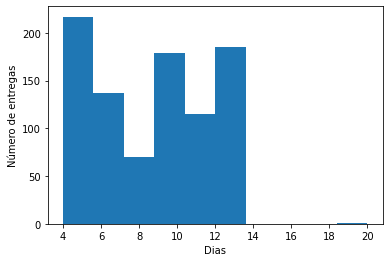

In [36]:
#Histograma do "Tempo Envio (dia)"
plt.hist(df["Tempo Envio (dia)"])
plt.xlabel("Dias")
plt.ylabel("Número de entregas");

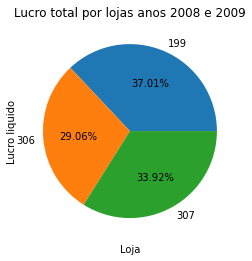

In [37]:
#Soma das receitas nos anos 2008 e 2009 por loja
df.groupby("ID Loja")["Lucro liquido"].sum().plot.pie(autopct='%.2f%%', title="Lucro total por lojas anos 2008 e 2009")
plt.xlabel("Loja")
plt.ylabel("Lucro liquido");



In [38]:
#Qual a soma das receitas por loja?
df.groupby("ID Loja")["Lucro liquido"].sum().reset_index()


,ID Loja,Lucro liquido
0,199,1294718.49
1,306,1016493.09
2,307,1186611.42


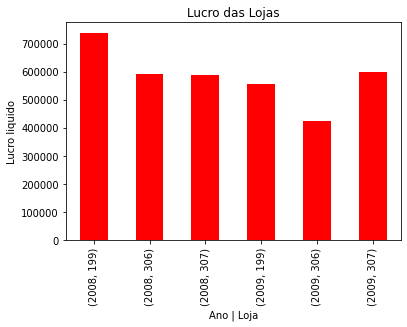

In [39]:
#Receitas das lojas separadas por ano
df.groupby([df["Data Venda"].dt.year, "ID Loja"])["Lucro liquido"].sum().plot.bar(color= "red", title="Lucro das Lojas")
plt.xlabel("Ano | Loja")
plt.ylabel("Lucro liquido");


In [40]:
#Quais os valores das receitas das lojas separada por ano?
df.groupby([df["Data Venda"].dt.year, "ID Loja"])["Lucro liquido"].sum().reset_index()


,Data Venda,ID Loja,Lucro liquido
0,2008,199,738540.76
1,2008,306,593037.45
2,2008,307,588499.42
3,2009,199,556177.73
4,2009,306,423455.64
5,2009,307,598112.00


In [41]:
#Criando dois DataFrame dividido por ano 
df_2008 = df[df["Data Venda"].dt.year == 2008]
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [42]:
#Nome das colunas DataFrame => df_2009
df_2009.columns

Index(['Data Venda', 'Data Envio', 'Tempo Envio (dia)', 'ID Loja',
       'Custo Unitário', 'Preço Unitário', 'Quantidade', 'Custo Total Produto',
       'Valor Desconto', 'Valor Venda', 'Lucro liquido', 'Produto'],
      dtype='object')

In [43]:
#Renomear colunas ano 2008
df_2008 = df_2008.rename(columns={'Quantidade':'Quantidade 2008', 'Custo Total Produto': 'Custo Total Produto 2008', 'Valor Desconto':'Valor Desconto 2008',
                                  'Lucro liquido':'Lucro liquido 2008'})

In [44]:
#Renomear colunas ano 2009
df_2009 = df_2009.rename(columns={'Quantidade':'Quantidade 2009', 'Custo Total Produto': 'Custo Total Produto 2009', 'Valor Desconto':'Valor Desconto 2009',
                                  'Lucro liquido':'Lucro liquido 2009'})

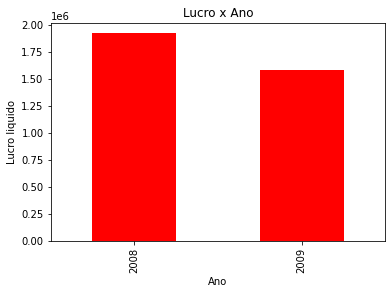

In [45]:
#Comparação do "Lucro liquido" entre os anos de 2008 e 2009
df.groupby(df["Data Venda"].dt.year)["Lucro liquido"].sum().plot.bar(color="red", title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro liquido");


In [46]:
#Qual o valor do "Lucro liquido" entre os anos de 2008 e 2009?
df.groupby(df["Data Venda"].dt.year)["Lucro liquido"].sum().reset_index()

,Data Venda,Lucro liquido
0,2008,1920077.63
1,2009,1577745.37


In [47]:
#Analise do "Lucro liquido" (receita) nos anos 2008 e 2009
deficit = round(df_2008["Lucro liquido 2008"].sum() - df_2009["Lucro liquido 2009"].sum(),2)
print(f'Identificado déficit de R$:{deficit} entre os anos de 2008 e 2009.')

Identificado déficit de R$:342332.26 entre os anos de 2008 e 2009.


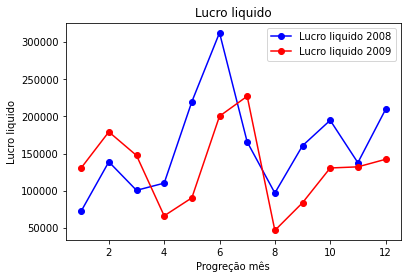

In [74]:
#Comparativo do lucro liquido dos anos 2008 e 2009 ao logo dos meses
df_2008.groupby(df_2008["Data Venda"].dt.month)["Lucro liquido 2008"].sum().plot(color= "blue", marker = "o")
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro liquido 2009"].sum().plot(color= "red", title="Lucro liquido", marker = "o")
plt.xlabel("Progreção mês")
plt.ylabel("Lucro liquido")
plt.legend();

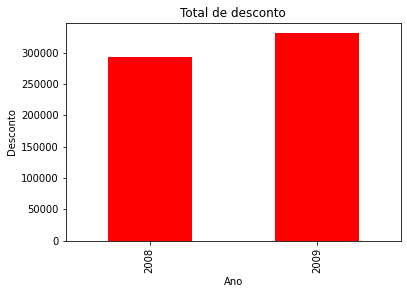

In [48]:
#Comparativo dos descontos oferecido aos clientes nos anos de 2008 e 2009
df.groupby(df["Data Venda"].dt.year)["Valor Desconto"].sum().plot.bar(title="Total de desconto", color= "red")
plt.xlabel("Ano")
plt.ylabel("Desconto");

In [49]:
#Qual o somaório dos descontos no ano?
df.groupby(df["Data Venda"].dt.year)["Valor Desconto"].sum().reset_index()

,Data Venda,Valor Desconto
0,2008,292434.0190
1,2009,330533.4384


In [50]:
#Analise dos descontos oferecidos nos anos de 2008 e 2009
desconto = round(df_2009["Valor Desconto 2009"].sum() - df_2008["Valor Desconto 2008"].sum(),2)
print(f'Aumento de desconto aos clientes em 2009 de R$:{desconto}')

Aumento de desconto aos clientes em 2009 de R$:38099.42


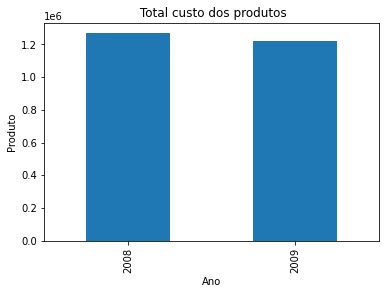

In [51]:
#Compativo dos custos de compras nos anos 2008 e 2009
df.groupby(df["Data Venda"].dt.year)["Custo Total Produto"].sum().plot.bar(title=" Total custo dos produtos")
plt.xlabel("Ano")
plt.ylabel("Produto");

In [52]:
#Qual o somaório custo total dos produtos entre os anos 2008 e 2009?
df.groupby(df["Data Venda"].dt.year)["Custo Total Produto"].sum().reset_index()

,Data Venda,Custo Total Produto
0,2008,1267529.94
1,2009,1219253.11


In [53]:
#Analise do custo total dos produtos nos anos de 2008 e 2009
compra = round(df_2009["Custo Total Produto 2009"].sum() - df_2008["Custo Total Produto 2008"].sum(),2)
print(f'Redução de custo no valor da compra de R$:{abs(compra)}')

Redução de custo no valor da compra de R$:48276.83


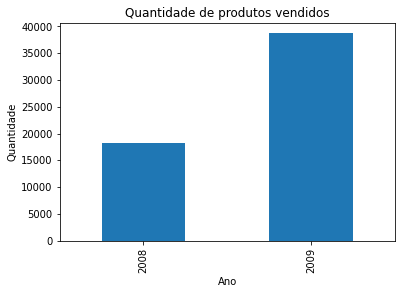

In [126]:
#Comparação de quantidade de produtos vendidos por ano
df.groupby(df["Data Venda"].dt.year)["Quantidade"].sum().plot.bar(title="Quantidade de produtos vendidos")
plt.xlabel("Ano")
plt.ylabel("Quantidade");

In [54]:
#Qual a quantidade de produtos vendidos nos anos de 2008 e 2009?
df.groupby(df["Data Venda"].dt.year)["Quantidade"].sum().reset_index()

,Data Venda,Quantidade
0,2008,18212
1,2009,38695


In [55]:
#Analise na quantidade de volume vendido nos anos de 2008 e 2009
produto = round(df_2009["Quantidade 2009"].sum() - df_2008["Quantidade 2008"].sum(),2)
print(f'Aumento na quantidade de produtos vendidos {produto} unidades')

Aumento na quantidade de produtos vendidos 20483 unidades


In [56]:
#Descrininação de Loja | Prudoto | Quantidade | Lucro liqido no ano de 2008
tabela_venda_2008 = df_2008.groupby(["ID Loja","Produto"])["Quantidade 2008","Lucro liquido 2008"].sum().reset_index()
tabela_venda_2008

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ID Loja,Produto,Quantidade 2008,Lucro liquido 2008
0,199,Adventure Works Laptop15.4W M1548 Black,113,37964.36
1,199,Adventure Works Laptop15.4W M1548 Red,158,54758.56
2,199,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,245,151874.25
3,199,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,191,113589.74
4,199,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,127,75869.98
5,199,Fabrikam Trendsetter 2/3'' 17mm X100 Black,255,151032.05
6,199,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,239,134471.09
7,199,Headphone Adapter for Contoso Phone E130 Silver,2256,8273.17
8,199,Headphone Adapter for Contoso Phone E130 White,2836,10707.56
9,306,Adventure Works Laptop15.4W M1548 Black,130,44211.98


In [57]:
#Descrininação de Loja | Prudoto | Quantidade | Lucro liqido no ano de 2009
tabela_venda_2009 = df_2009.groupby(["ID Loja","Produto"])["Quantidade 2009","Lucro liquido 2009"].sum().reset_index()
tabela_venda_2009

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ID Loja,Produto,Quantidade 2009,Lucro liquido 2009
0,199,Adventure Works Laptop15.4W M1548 Black,211,72705.72
1,199,Adventure Works Laptop15.4W M1548 Red,155,51407.90
2,199,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,114,60668.64
3,199,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,132,73418.28
4,199,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,102,58787.28
5,199,Fabrikam Trendsetter 2/3'' 17mm X100 Black,178,96702.18
6,199,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,168,94069.08
7,199,Headphone Adapter for Contoso Phone E130 Silver,5635,20356.78
8,199,Headphone Adapter for Contoso Phone E130 White,7004,28061.87
9,306,Adventure Works Laptop15.4W M1548 Black,223,76481.76


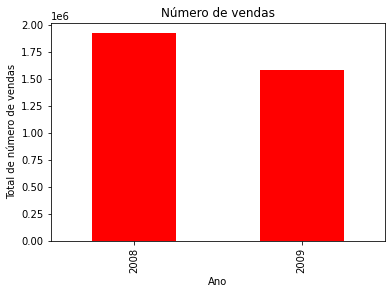

In [58]:
#Comparativo no números de vendas de 2008 e 2009
df.groupby(df["Data Venda"].dt.year)["Lucro liquido"].sum().plot.bar(title="Número de vendas", color = 'red')
plt.xlabel("Ano")
plt.ylabel("Total de número de vendas");

In [59]:
#Analise de vendas
n_vendas2008 = df_2008['Data Venda'].count()
n_vendas2009 = df_2009['Data Venda'].count()
print(f'Números de vesdas ano 2008 = {n_vendas2008}')
print(f'Números de vesdas ano 2009 = {n_vendas2009}')
print()
print(f'Redução de {n_vendas2008 - n_vendas2009} número de vendas no ano de 2009')

Números de vesdas ano 2008 = 469
Números de vesdas ano 2009 = 435

Redução de 34 número de vendas no ano de 2009


In [60]:
#Total de vendas
n_vendas2008 + n_vendas2009 

904

In [61]:
#Total de vendas
df['Data Venda'].count()

904